# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

In [83]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


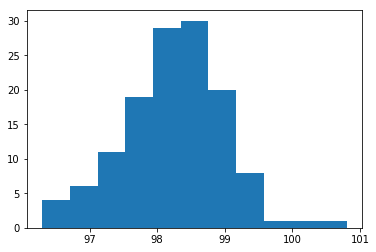

In [84]:
plt.hist(df['temperature'], bins=11)
plt.show()

### Answer 1:  little difficult to tell whether the distribution of the temperatures is Normal from the histogram

In [85]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    #Number of data points: n
    n = len(data)

    #x-data for the ECDF: x
    x = np.sort(data)

    #y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

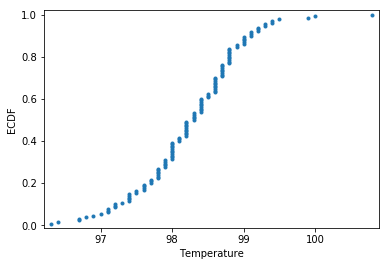

In [86]:
# Compute ECDF
x_vers, y_vers = ecdf(df['temperature'])

_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = plt.margins(.02)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
plt.show()

# Answer 1: The distribution does seem to tending to normal

In [87]:
print(df.shape)
print(np.mean(df['temperature']))

(130, 3)
98.24923076923078


### Answer 2: The number of observations is not particularly large although bootstrapping could allow us to see what the distribution possibilities are with more similar observations.

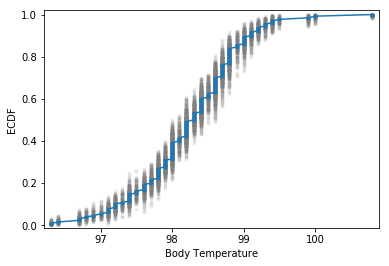

In [88]:
for _ in range(100):
    bs_sample = np.random.choice(df['temperature'], size=len(df['temperature']))

    # ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# original data plot
x, y = ecdf(df['temperature'])
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('ECDF')

plt.show()

# Answer 3A: bootstrap test shows that 98.6 is certainly within the possible mean distribution

In [89]:
#one samplt t-test
import scipy.stats as stats
stats.ttest_1samp (a= df['temperature'],    # Sample data
                 popmean=98.6)  # Pop mean


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### A low p-value from the t-stat shows that we can reject the null hypothesis that the population mean can really be 98.6 degrees

In [90]:
stats.t.ppf(q=0.025,  # checking 2.5 quintile
            df=129)

-1.9785244914586055

In [91]:
#one sample z-test
from statsmodels.stats import weightstats as stests

testResult=stests.ztest(df['temperature'],value=98.6)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")


p-value is: 4.9021570141012155e-08



### Again, extremely low p value gives us a similar result.
### Answer 3D: Z-Test might actually be more appropriate here because of the larger sample size of the temp data

In [92]:
# Answer 4: t-test
random10 = np.random.choice(df['temperature'],10)
stats.ttest_1samp (random10, popmean= 98.6)

Ttest_1sampResult(statistic=-1.8358208955223758, pvalue=0.09957072216001915)

In [93]:
testResult=stests.ztest(random10,value=98.6)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")


p-value is: 0.06638415001883916



### We see that the p-value for both the t-stat and the z-stat are above 0.05 and in the case of the Ttest where the pvalue is close to .1
### For a smaller sample, we see that a T-stat is more appropriate as it gives us the more conservative result which in the case of such a small sample is much less likely to result in a significant p-value

In [94]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.06405661469519336
0.06393502658052207


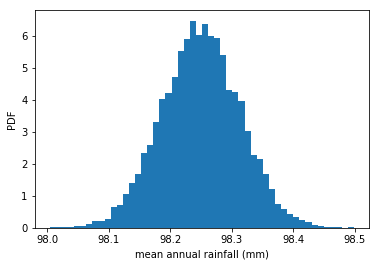

In [95]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [96]:
# Confidence interval for the bootstrap replicates

print('95% confidence interval =', stats.norm.interval(0.95, loc=np.mean(bs_replicates), scale=bs_std), 'degrees')

95% confidence interval = (98.1241001890131, 98.37472088790999) degrees


In [97]:
#Answer 6: 
#A two-sample bootstrap hypothesis test for difference of means

def diff_means(data1,data2):    
    difference = np.mean(data1)-np.mean(data2)
    return difference

# mean of all data
mean_temp = np.mean(df['temperature'])

# seperating the data by gender
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

print(np.mean(males))
print('95% confidence interval =', stats.norm.interval(0.95, loc=np.mean(males), scale=bs_std), 'degrees')
print(np.mean(females))
print('95% confidence interval =', stats.norm.interval(0.95, loc=np.mean(females), scale=bs_std), 'degrees')
                 
empirical_diff_means = diff_means(males['temperature'], females['temperature'])

# Generate shifted arrays
temp_males_shifted = males['temperature'] - np.mean(males['temperature']) + mean_temp
temp_females_shifted = females['temperature'] - np.mean(females['temperature']) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(temp_males_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(temp_females_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


temperature    98.104615
heart_rate     73.369231
dtype: float64
95% confidence interval = (array([97.97930504, 73.24392042]), array([98.22992573, 73.49454112])) degrees
temperature    98.393846
heart_rate     74.153846
dtype: float64
95% confidence interval = (array([98.2685358, 74.0285358]), array([98.5191565, 74.2791565])) degrees
p-value = 0.0126


### we test the hypothesis that the true mean of the body temperature for males is equal to that of females. With a p-value of arond 0.01 we can reject the null hypothesis and draw the conclusion that there is indeed a significant difference between the temperatures of males and females given our data.

# Final Thoughts

### We aimed to test whether the mean body temperature of  37∘∘C or 98.6∘∘F as conceptualized by Carl Wunderlich in a famous 1868 book was indeed statistically correct. Using a human body temperature data set of 130 records we could see a normal distribution of the temperature with a mean closer to 98.2∘∘F. We then tested the statistical significance of this difference and identified that a mean temperature of 98.6∘∘F, which was proposed by Mr. Wunderlich, was not statistically likely. Given the small data set we created hypothetical iterations of this data to test the likelihood of having the higher normal temperature and agin showed that the difference is indeed statistically significant. Finally, we compared the normal body temperature of males and females in our sample and again used the itirative bootstrap method to see whether the body temperatures are difference. We indeed saw a statistically signifcant difference in the normal body temperature between the genders of ~0.3∘∘F on average.